In [2]:
# install fredapi, plotly
%pip install fredapi plotly --quiet 



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 

# set up style for plt
plt.style.use('fivethirtyeight')

# set max column to 500
pd.options.display.max_columns = 500


# add a color pallete
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

# import fredapi 
from fredapi import Fred 

# set env requirements
from dotenv import find_dotenv, load_dotenv
import os 

load_dotenv(find_dotenv())

# set secret key
FRED_API_KEY = os.getenv('FRED_API_KEY')




## Step 1. Creaete Fred Object and Search for Sample Dataset

In [6]:
# create fred object
fred = Fred(api_key=FRED_API_KEY)

# search for a sample dataset
fred.search('S&P')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2023-01-31,2023-01-31,S&P 500,2013-02-01,2023-01-31,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-01-31 19:10:58-06:00,84,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2023-01-31,2023-01-31,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2023-01-30,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-01-31 08:36:01-06:00,55,"Copyright, 2016, Chicago Board Options Exchang..."
VXOCLS,VXOCLS,2023-01-31,2023-01-31,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,36,This series is no longer being updated by the ...
CSUSHPINSA,CSUSHPINSA,2023-01-31,2023-01-31,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-01-31 08:01:02-06:00,90,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2023-01-31,2023-01-31,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-01-31 08:01:04-06:00,83,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RGDPNABNA666NRUG,RGDPNABNA666NRUG,2023-01-31,2023-01-31,Real GDP at Constant National Prices for Brune...,1970-01-01,2019-01-01,Annual,A,Millions of 2017 U.S. Dollars,Mil. of 2017 U.S. $,Not Seasonally Adjusted,NSA,2021-11-08 13:29:58-06:00,3,Source ID: rgdpna When using these data in yo...
HC01ESTVC1712115,HC01ESTVC1712115,2023-01-31,2023-01-31,Bachelor's Degree or Higher (5-year estimate) ...,2010-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-12-08 10:48:55-06:00,3,Estimate of educational attainment for populat...
RKNANPILA666NRUG,RKNANPILA666NRUG,2023-01-31,2023-01-31,Capital Stock at Constant National Prices for ...,1950-01-01,2019-01-01,Annual,A,Millions of 2017 U.S. Dollars,Mil. of 2017 U.S. $,Not Seasonally Adjusted,NSA,2021-11-08 13:33:35-06:00,3,Source ID: rkna When using these data in your...


In [9]:
# customize the search option
sp_search = fred.search('S&P', order_by='popularity', sort_order='desc')

sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-01-31,2023-01-31,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-01-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-01-31 09:10:11-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-01-31,2023-01-31,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-01-31 08:01:02-06:00,90,"For more information regarding the index, plea..."
SP500,SP500,2023-01-31,2023-01-31,S&P 500,2013-02-01,2023-01-31,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-01-31 19:10:58-06:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-01-31,2023-01-31,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-01-30,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-01-31 09:09:02-06:00,84,This data represents the effective yield of th...
CSUSHPISA,CSUSHPISA,2023-01-31,2023-01-31,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-01-31 08:01:04-06:00,83,"For more information regarding the index, plea..."


## Step 2. Download the Raw Data


In [10]:
# get data series with id 'SP500'
fred.get_series(series_id='SP500')

2013-02-01    1513.17
2013-02-04    1495.71
2013-02-05    1511.29
2013-02-06    1512.12
2013-02-07    1509.39
               ...   
2023-01-25    4016.22
2023-01-26    4060.43
2023-01-27    4070.56
2023-01-30    4017.77
2023-01-31    4076.60
Length: 2608, dtype: float64

## Step 3. Plot the Series

<AxesSubplot:>

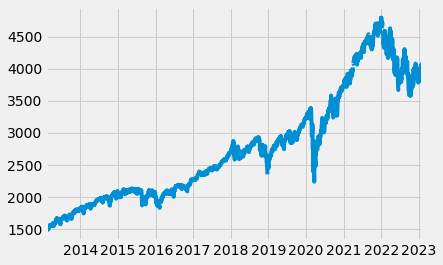

In [11]:
sp500 = fred.get_series(series_id='SP500')

sp500.plot()

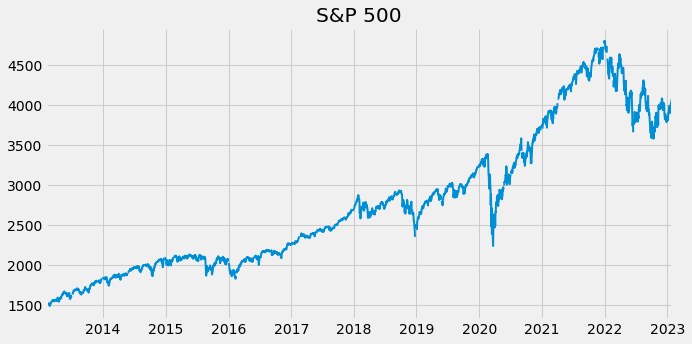

In [12]:
# style the plot
sp500.plot(figsize=(10,5),
            title='S&P 500',
            lw=2
)

plt.show()